<a href="https://colab.research.google.com/github/mralamdari/Computer-Vision-Projects/blob/main/Emotion_Detection_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive'
!kaggle datasets download -d msambare/fer2013
!unzip \*.zip && rm *.zip

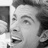

In [3]:
tf.keras.preprocessing.image.load_img('/content/train/happy/Training_10239785.jpg')

In [4]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                                  horizontal_flip=True,
                                                                  zoom_range=0.2)

train_dataset = train_generator.flow_from_directory('/content/train',
                                                   target_size=(48, 48),
                                                   class_mode='categorical',
                                                   batch_size=32, 
                                                   shuffle=True)

Found 28709 images belonging to 7 classes.


In [5]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

test_dataset = test_generator.flow_from_directory('/content/test/',
                                                 target_size=(48, 48),
                                                 class_mode='categorical',
                                                 batch_size=1,
                                                 shuffle=False)

Found 7178 images belonging to 7 classes.


In [6]:
x = np.unique(train_dataset.classes, return_counts=True)

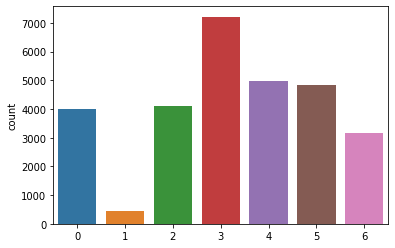

In [7]:
sns.countplot(x=train_dataset.classes)

In [66]:
class Network(tf.keras.Model):
  def __init__(self, classes, chanDim=-1):
    super(Network, self).__init__()
    
    self.conv1 = tf.keras.layers.Conv2D(32, 3, padding='same')
    self.bn1 = tf.keras.layers.BatchNormalization()
    self.activation = tf.keras.layers.Activation('relu')
    self.conv2 = tf.keras.layers.Conv2D(64, 3, padding='same')
    self.bn2 = tf.keras.layers.BatchNormalization()
    self.pool1 = tf.keras.layers.MaxPooling2D(pool_size=2)
    self.pool2 = tf.keras.layers.MaxPooling2D(pool_size=2)
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(64)
    self.drop = tf.keras.layers.Dropout(0.5)
    self.softmax = tf.keras.layers.Activation('softmax')
    self.dense2 = tf.keras.layers.Dense(classes)

  def call(self, inputs):
    x = self.conv1(inputs)
    x = self.activation(x)
    x = self.bn1(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.activation(x)
    x = self.bn2(x)
    x = self.pool2(x)
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.drop(x)
    x = self.dense2(x)
    x = self.softmax(x)
    return x

In [67]:
model = Network(len(train_dataset.class_indices))

In [68]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [69]:
# model.summary()

In [ ]:
model.fit(train_dataset, epochs=20)

Epoch 1/20
898/898 [==============================] - 162s 181ms/step - loss: 1.4849 - accuracy: 0.4329
Epoch 2/20
898/898 [==============================] - 161s 180ms/step - loss: 1.4470 - accuracy: 0.4501
Epoch 3/20
898/898 [==============================] - 165s 183ms/step - loss: 1.4112 - accuracy: 0.4635
Epoch 4/20
898/898 [==============================] - 163s 181ms/step - loss: 1.3777 - accuracy: 0.4798
Epoch 5/20
898/898 [==============================] - 163s 182ms/step - loss: 1.3505 - accuracy: 0.4893
Epoch 6/20
898/898 [==============================] - 164s 183ms/step - loss: 1.3290 - accuracy: 0.4982
Epoch 7/20
898/898 [==============================] - 162s 180ms/step - loss: 1.3118 - accuracy: 0.5059
Epoch 8/20
112/898 [==>...........................] - ETA: 2:20 - loss: 1.2691 - accuracy: 0.5268